#### Helper Code

This code runs out of the box on Google Colab. It is also the recommended way to run this notebook if you do not already have an environment with Python 3 and TensorFlow already set up.

In [0]:
import numpy as np
import os

matplotlib_style = "ggplot"
import matplotlib.pyplot as plt; plt.style.use(matplotlib_style)
import matplotlib.axes as axes;
from matplotlib.patches import Ellipse
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')

from IPython.core.pylabtools import figsize
notebook_screen_res = "retina"
%config InlineBackend.figure_format = notebook_screen_res

from IPython.display import clear_output

In [2]:
import tensorflow as tf
try:
    tf.enable_eager_execution()
    print("Enabled eager execution")
except Exception as e:
    print(e)
    print("Eager execution:", tf.executing_eagerly() )
    

import tensorflow_probability as tfp
tfd = tfp.distributions
tfb = tfp.bijectors

print("TensorFlow\t\t", ":", tf.__version__)
print("TensorFlow Probability\t", ":", tfp.__version__)

from tensorflow.python.client import device_lib

local_device_protos = device_lib.list_local_devices()
print("Devices:")
print([x.name for x in local_device_protos])

Enabled eager execution

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

TensorFlow		 : 1.13.1
TensorFlow Probability	 : 0.6.0
Devices:
['/device:CPU:0', '/device:XLA_CPU:0', '/device:XLA_GPU:0', '/device:GPU:0']


In [0]:
def evaluate(tensors):
    """Evaluates Tensor or EagerTensor to Numpy `ndarray`s.
    Args:
    tensors: Object of `Tensor` or EagerTensor`s; can be `list`, `tuple`,
      `namedtuple` or combinations thereof.
 
    Returns:
      ndarrays: Object with same structure as `tensors` except with `Tensor` or
        `EagerTensor`s replaced by Numpy `ndarray`s.
    """
    return tf.contrib.framework.nest.pack_sequence_as(tensors,
                                                      [t.numpy() if tf.contrib.framework.is_tensor(t) else t
                                                       for t in tf.contrib.framework.nest.flatten(tensors)])

In [0]:
from sklearn.metrics import mean_squared_error

# 02. Special Distributions

## Bernoulli Random Variable

A **Bernoulli process** is an experiment with two outcomes. A single trial of a Bernoulli process is called a Bernoulli trial. The parameter $p$ is usually called the success rate, especially if 1 represents success and 0 represents failure.

A discrete RV $X$ is called Bernoulli if it takes two values `0` and `1`.

*   The pmf p($x$) of $X$ is given by p(1) = $p$, p(0) = 1 − $p$ for some $0 ≤ p ≤ 1$.
*  $X$ is the Bernoulli RV with parameter $p$.
* A **Bernoulli distribution** is the distribution of a Bernoulli RV.
* Expectation: **E**[$X$] = $p$
* Variance: var($X$) = $p(1-p)$

In [0]:
b = tfd.Bernoulli(probs=0.5)
observations = b.sample(100)

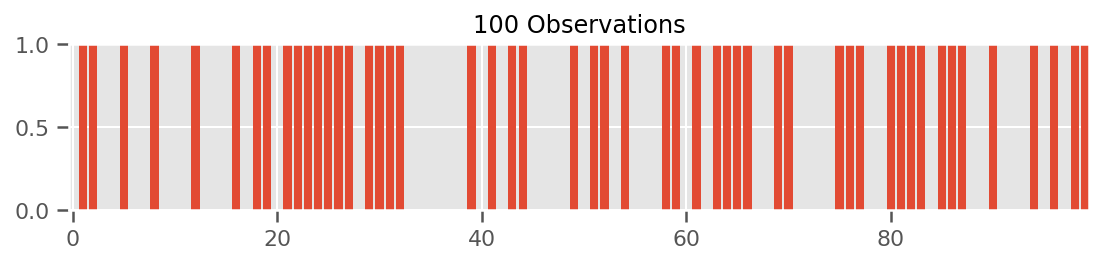

In [6]:
plt.figure(figsize(8, 2))
plt.bar(range(len(observations)),
         observations)
plt.autoscale(tight=True)
plt.title("100 Observations")
plt.tight_layout()

## Binomial Distribution


A discrete RV X is called **binomial** if it takes on ﬁnitely many values 0 .. $n$, and its pmf p($x$) is given by:

p$(x) = \binom{n}{x}p^x(1-p)^{n-x}$

for some $0 ≤ p ≤ 1$ .

* $X$ is the binomial RV with parameters $n$ and $p$
* A **binomial distribution** is the distribution of a binomial RV.

**Applications**

* Model the sum of $n$ trials of a Bernoulli process
* e.g. the number of heads of n coin tosses.
* Bernoulli RV is a binomial RV with one trial (i.e. $n=1$)

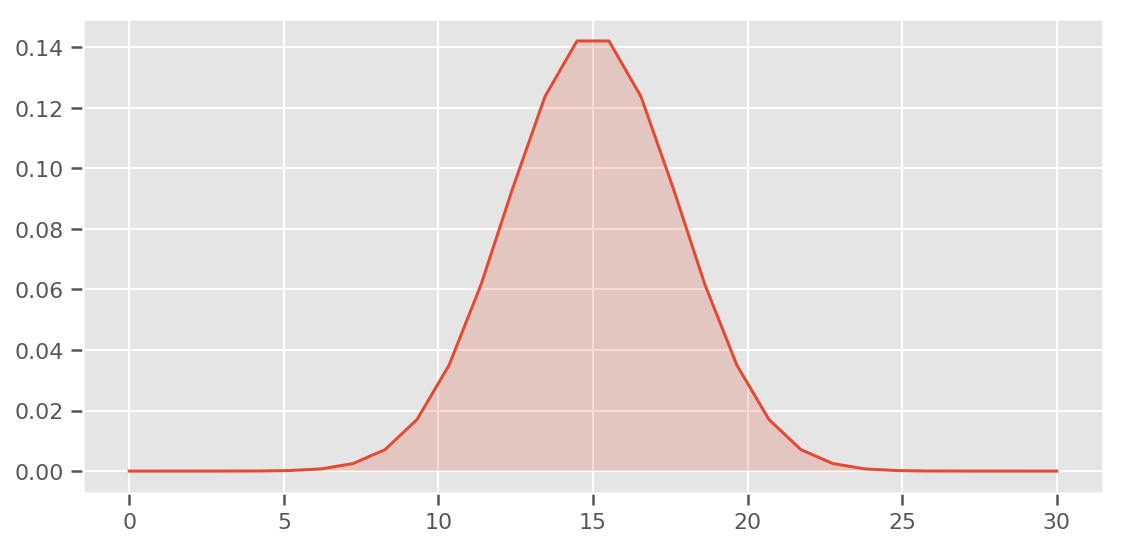

In [7]:
#@title Binomial distribution parameters { run: "auto" }
n = 30 #@param {type:"slider", min:1, max:60, step:1}
p = 0.5 #@param {type:"slider", min:0, max:1, step:0.05}

space = tf.linspace(start=0., stop=n, num=n, name="linspace")

binomial = tfd.Binomial(total_count=n, probs=p)
binomial_values = binomial.prob(space[:, tf.newaxis])
binomial_values = binomial_values.numpy().reshape((n))

plt.figure(figsize(8, 4))

plt.plot(space,
         binomial_values)
plt.fill_between(space, 0, binomial_values, alpha=0.2)

plt.tight_layout()
plt.show()

## Geometric Distribution

A discrete RV $X$ is called geometric if it takes on non-negative integer values $0,1,2...$ and its pmf p($x$) is given by:

p($x$) = $p(1 − p)^{x}$

for some $0<p<1$ .

* $X$ is the geometric RV with parameter $p$.
* A **geometric distribution** is the distribution of a geometric RV
* **E**[$X$] = $\frac{1-p}{p}$
* var($X$) = $\frac{1-p}{p^2}$

Every geometric RV $X$ has the **memoryless property**.

i.e. $\Pr(X = k + t|X ≥ k) = Pr(X = t)$ for all integers $k, t ≥ 0$ .

**Applications**

* To model the number of failed trials in a Bernoulli process immediately before the ﬁrst success.
* e.g. the number of coin tosses before getting the ﬁrst heads


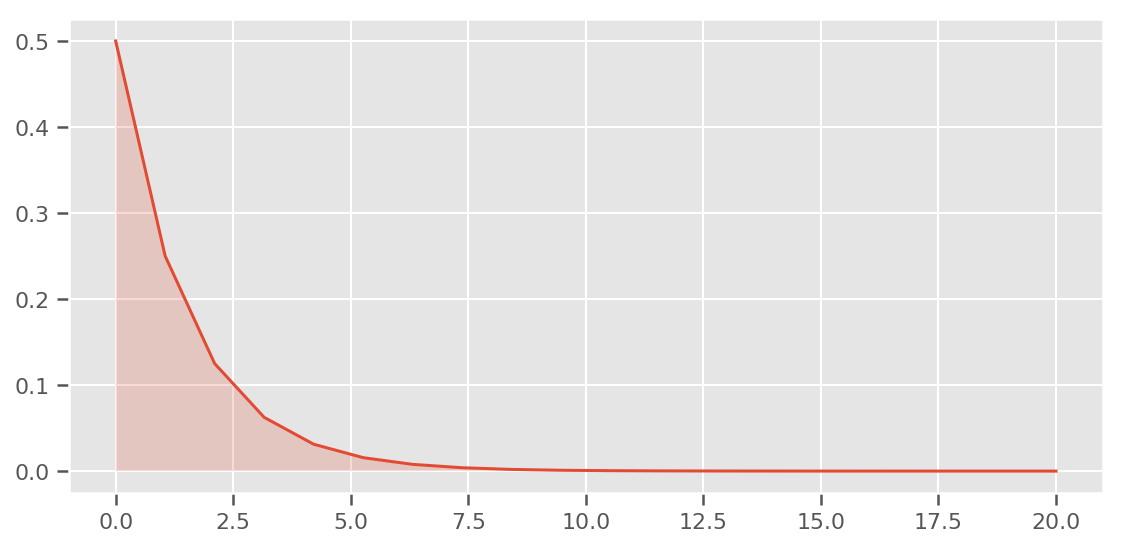

In [8]:
#@title Geometric parameter  { run: "auto" }
parameter = 0.5 #@param {type:"slider", min:0, max:1, step:0.1}

n = 20

space = tf.linspace(start=0., stop=20, num=20, name="linspace")

geometric = tfd.Geometric(probs=parameter)
geometric_values = geometric.prob(space[:, tf.newaxis])
geometric_values = geometric_values.numpy().reshape(n)

plt.plot(space,
         geometric_values)
plt.fill_between(space, 0, geometric_values, alpha=0.2)
plt.tight_layout()
plt.show()

## Poisson Distribution

A discrete RV $X$ is called Poisson if it takes on non-negative integer values 0, 1, 2, . . . , and its pmf p(x) is given by:

p($x$) = $\frac{\lambda^x e^{-\lambda}}{x!}$

for some real number $\lambda>0$ .

* X is the Poisson RV with parameter $\lambda$ (rate).
* A **Poisson distribution** is the distribution of a Poisson RV
* **E**[$X$] = $\lambda$
* var($X$) = $\lambda$

**Applications**

* To model the number of occurrences of an event during a certain time period.
* e.g. number of cars entering carpark in the morning.
* e.g. number of people visiting cinema in the past hour.

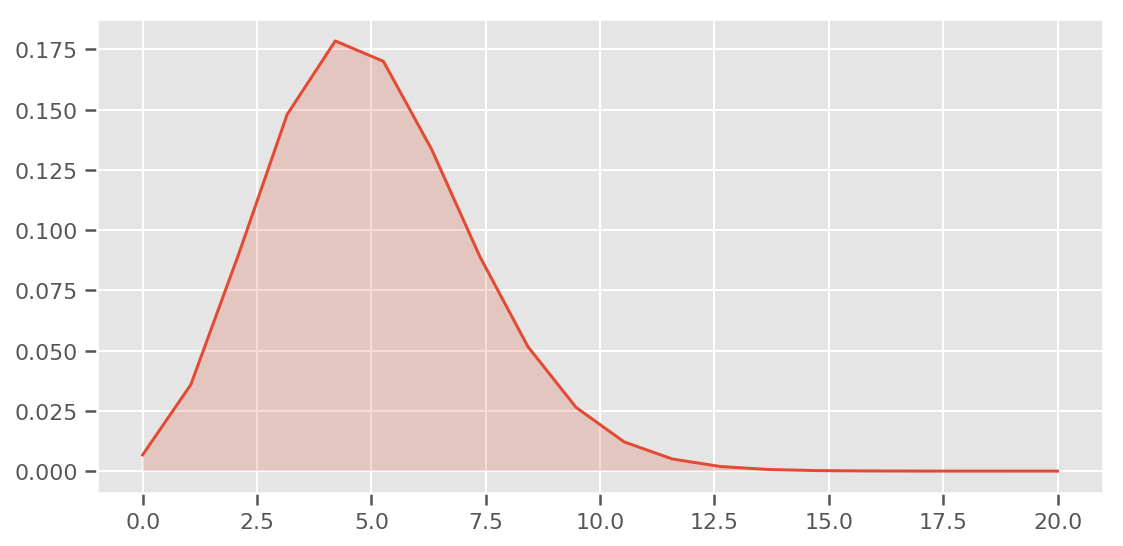

In [9]:
#@title Poisson parameter  { run: "auto" }
rate = 5 #@param {type:"slider", min:1, max:20, step:1}

n = 20

space = tf.linspace(start=0., stop=20, num=20, name="linspace")

poisson = tfd.Poisson(rate=rate)
poisson_values = poisson.prob(space[:, tf.newaxis])
poisson_values = poisson_values.numpy().reshape(n)

plt.plot(space,
         poisson_values)
plt.fill_between(space, 0, poisson_values, alpha=0.2)
plt.tight_layout()
plt.show()

## Exponential Distribution

A continuous R.V. X is called exponential if its pdf is given by:

$f(x) = \lambda  e^{-\lambda x}$ if $x≥0$;

$f(x) = 0$ otherwise

for some real number $\lambda > 0$ .

* $X$ is the exponential RV with parameter $\lambda$
* Its distribution is called **exponential distribution**.
* Its cdf is F$(x) = 1 - e^{-\lambda x}$ if $x ≥ 0$; $0$ otherwise.
* Expectation **E**[$X$] = $\frac{1}{\lambda}$
* Variance var($X$) = $\frac{1}{\lambda^2}$

**Applications**

* To model the elapsed time between two successive events.
* e.g. time between two successive cars entering carpark
* e.g. time between two people visiting grocery store.

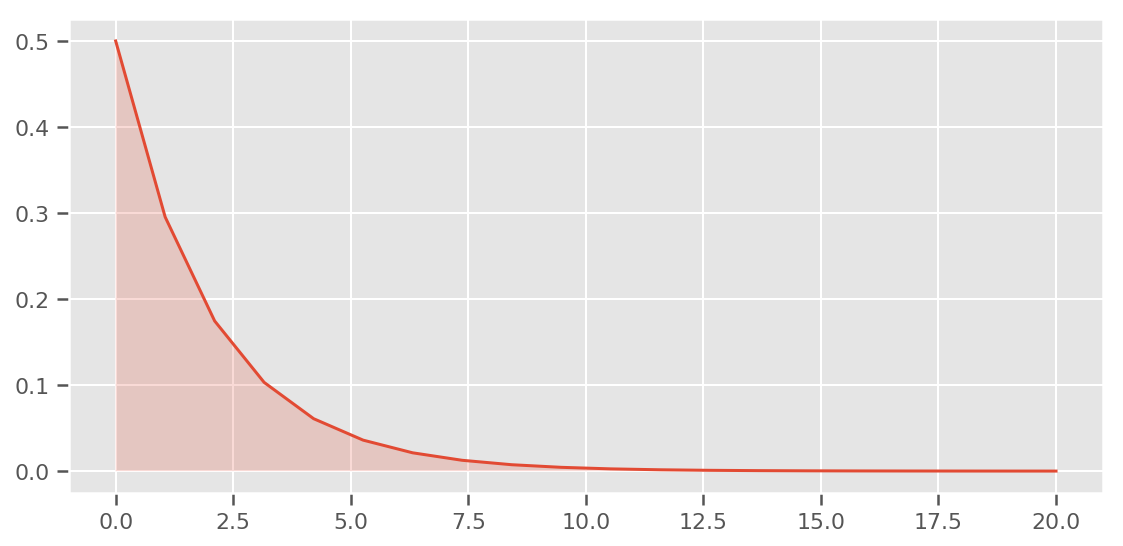

In [10]:
#@title Exponential parameter  { run: "auto" }
rate = 0.5 #@param {type:"slider", min:0, max:1, step:0.1}

n = 20

space = tf.linspace(start=0., stop=20, num=20, name="linspace")

exponential = tfd.Exponential(rate=rate)
exponential_values = exponential.prob(space[:, tf.newaxis])
exponential_values = exponential_values.numpy().reshape(n)

plt.plot(space,
         exponential_values)
plt.fill_between(space, 0, exponential_values, alpha=0.2)
plt.tight_layout()
plt.show()

## Gamma Distribution

In probability theory and statistics, the gamma distribution is a two-parameter family of continuous probability distributions. The exponential distribution, Erlang distribution, and chi-squared distribution are special cases of the gamma distribution.

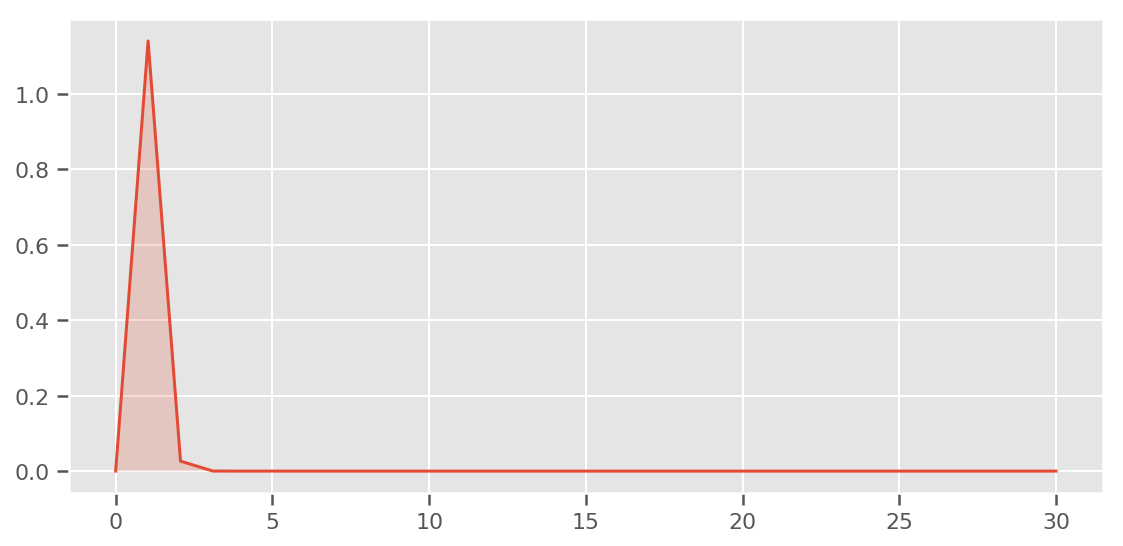

In [11]:
#@title Gamma distribution parameters  { run: "auto" }
alpha = 9 #@param {type:"slider", min:0, max:20, step:0.5}
beta = 9 #@param {type:"slider", min:0, max:20, step:0.5}

n = 30

space = tf.linspace(start=0., stop=n, num=n, name="linspace")

theta = tfd.Gamma(concentration=alpha,
                  rate=beta)
theta_values = theta.prob(space[:, tf.newaxis])
theta_values = theta_values.numpy().reshape(n)

plt.plot(space,
         theta_values)
plt.fill_between(space, 0, theta_values, alpha=0.2)
plt.tight_layout()
plt.show()

## References

1. Lecture 6, Introduction to Probability and Statistics, 50.034 (2018), Singapore University of Technology and Design

